In [1]:
pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.6 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 6.3 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 6.5 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 6.5 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 6.3 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.1 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.3 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 6.4 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('E:/Guvi/Data-Driven Menu Strategy/restaurant_orders.csv')
df

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56
...,...,...,...,...,...,...,...,...
495,6323,Alyssa Anthony,Pizza,Main,1,21.31,Cash,2025-01-15 19:21:02
496,9836,Jerry Pineda,Soup,Starter,3,15.99,Debit Card,2025-07-15 15:00:19
497,1202,Brandy Smith,Pasta,Main,2,8.54,Credit Card,2025-08-03 23:47:28
498,7876,Ivan Haynes,Soup,Starter,5,20.54,Credit Card,2025-07-23 08:10:06


In [7]:
df.shape

(500, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        500 non-null    int64  
 1   Customer Name   500 non-null    object 
 2   Food Item       500 non-null    object 
 3   Category        500 non-null    object 
 4   Quantity        500 non-null    int64  
 5   Price           500 non-null    float64
 6   Payment Method  500 non-null    object 
 7   Order Time      500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,500.0,5683.29600,2599.688068,1055.00,3342.00,5762.000,7945.00,9997.00
Quantity,500.0,3.03000,1.474261,1.00,2.00,3.000,4.00,5.00
Price,500.0,13.19718,6.685852,2.06,7.28,13.305,19.08,24.99


In [14]:
df.isna().sum()
df.isna().mean()*100

Order ID          0.0
Customer Name     0.0
Food Item         0.0
Category          0.0
Quantity          0.0
Price             0.0
Payment Method    0.0
Order Time        0.0
dtype: float64

In [15]:
df['Order Time'] = pd.to_datetime(df['Order Time'])


df['Year'] = df['Order Time'].dt.year
df['Month'] = df['Order Time'].dt.month
df['Day'] = df['Order Time'].dt.day
df['Hour'] = df['Order Time'].dt.hour
df["Month Name"] = df["Order Time"].dt.strftime("%b")
df["Day Name"] = df["Order Time"].dt.day_name()
df["Income"] = df["Quantity"] * df["Price"]


conditions = [
    (df['Hour'] >= 5) & (df['Hour'] < 11), 
    (df['Hour'] >= 11) & (df['Hour'] < 16), 
    (df['Hour'] >= 16) & (df['Hour'] < 22)  
]
choices = [
    'Breakfast',
    'Lunch',
    'Dinner'
]

df['Meal Time'] = np.select(conditions, choices, default='Late Night')

In [16]:
df.head()

,Order ID,Customer Name,Food Item,Category,Quantity,Price,Payment Method,Order Time,Year,Month,Day,Hour,Month Name,Day Name,Income,Meal Time
0,2268,Mary Vega DDS,Pasta,Main,5,16.52,Cash,2025-02-02 14:28:41,2025,2,2,14,Feb,Sunday,82.60,Lunch
1,3082,Brandon Myers,Brownie,Dessert,4,17.27,Debit Card,2025-06-08 10:57:47,2025,6,8,10,Jun,Sunday,69.08,Breakfast
2,3160,Margaret Wells,Pasta,Main,1,3.37,Credit Card,2025-03-04 07:41:41,2025,3,4,7,Mar,Tuesday,3.37,Breakfast
3,1272,Michael Matthews,Pasta,Main,5,2.20,Online Payment,2025-05-15 12:43:45,2025,5,15,12,May,Thursday,11.00,Lunch
4,9447,Connor Williams,Soup,Starter,1,12.23,Cash,2025-03-15 14:25:56,2025,3,15,14,Mar,Saturday,12.23,Lunch


In [17]:
df.columns

Index(['Order ID', 'Customer Name', 'Food Item', 'Category', 'Quantity',
       'Price', 'Payment Method', 'Order Time', 'Year', 'Month', 'Day', 'Hour',
       'Month Name', 'Day Name', 'Income', 'Meal Time'],
      dtype='object')

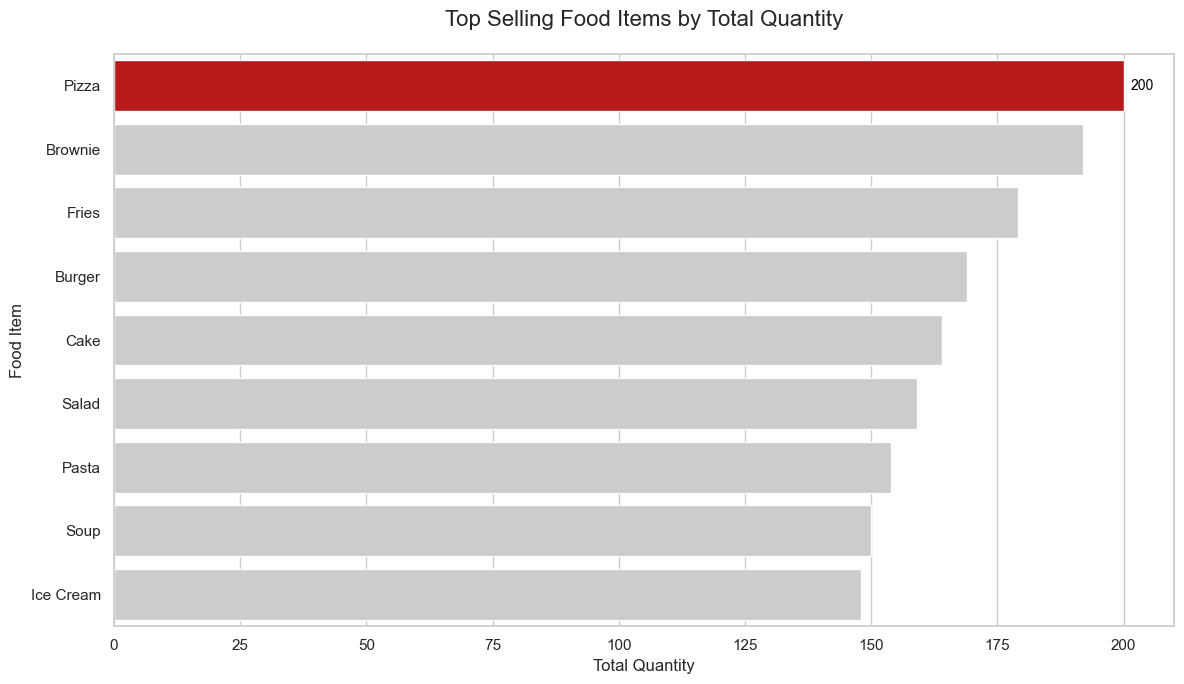

In [18]:
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
highlight_color = "#D10000"
base_color = "#CCCCCC"

order = df.groupby('Food Item')['Quantity'].sum().reset_index()
order = order.sort_values(by='Quantity', ascending=False)

num_categories = len(order)
palette = [highlight_color] + [base_color] * (num_categories - 1)
sns.barplot(x ="Quantity",
                 y = "Food Item",
                 palette = palette, 
                 order = order['Food Item'],
                 errorbar = None,
                 data = order,
                 ax = ax)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=5, fontsize=10, color='black')

plt.title("Top Selling Food Items by Total Quantity",fontsize = 16,pad = 20)
plt.xlabel("Total Quantity",fontsize = 12)
plt.ylabel("Food Item",fontsize = 12)

plt.tight_layout()
plt.show()

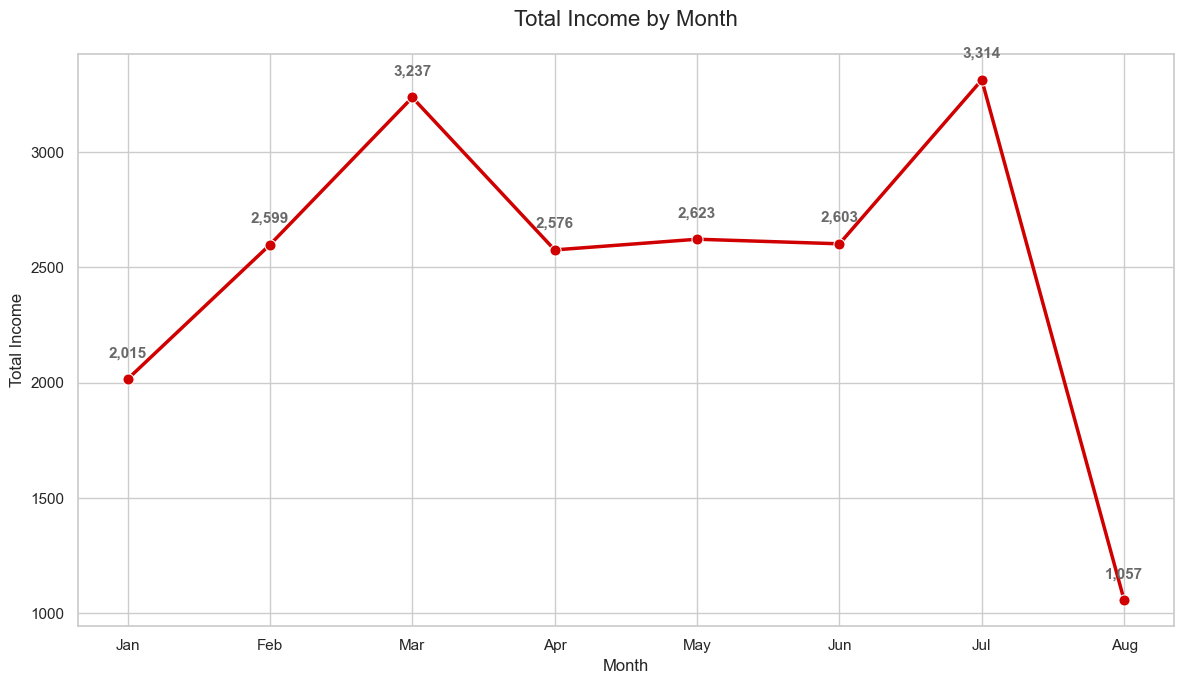

In [19]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (12,7))

agg_df = df.groupby("Month")["Income"].sum().reset_index()
sns.lineplot(x ="Month",
                 y = "Income",
                 palette = palette,
                 errorbar = None,
                 marker='o',           
                 markersize=8, 
                 linewidth=2.5,         
                 color='#D10000',
                 data = agg_df)
offset = 82
for index, row in agg_df.iterrows():
    plt.text(
        x=row['Month'],
        y=row['Income'] + offset,      
        s=f"{row['Income']:,.0f}",       
        ha='center',                     
        va='bottom',                     
        fontsize=11,
        fontweight='bold',
        color='dimgray'
    )
month_order = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug"
]
plt.title("Total Income by Month", fontsize = 16, pad = 20)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Total Income", fontsize = 12)

plt.xticks(ticks = range(1,9), labels = month_order) 

plt.tight_layout()
plt.show()


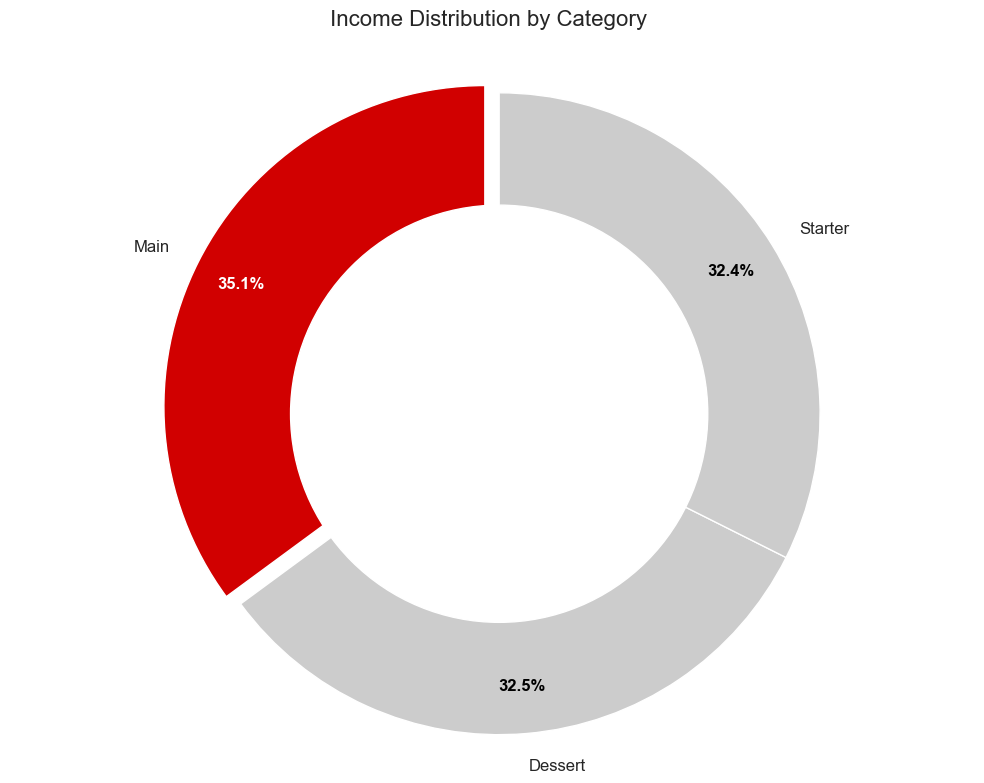

In [20]:
df_agg = df.groupby('Category')['Income'].sum().reset_index()
df_agg = df_agg.sort_values(by='Income', ascending=False).reset_index(drop=True)

highlight_color = '#D10000' 
base_color = '#CCCCCC'     
num_categories = len(df_agg)


colors = [highlight_color] + [base_color] * (num_categories - 1)

explode = [0.05] + [0] * (num_categories - 1)

sns.set_theme(style="whitegrid") 
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(
    df_agg['Income'],           
    labels=df_agg['Category'], 
    colors=colors,             
    explode=explode,            
    autopct='%1.1f%%',          
    startangle=90,              
    pctdistance=0.85,           
    textprops={'fontsize': 12}  
)
autotexts[0].set_color('white') 
autotexts[0].set_weight('bold')
for i in range(1, len(autotexts)):
    autotexts[i].set_color('black') 
    autotexts[i].set_weight('bold')

centre_circle = plt.Circle((0, 0), 0.65, fc='white')
ax.add_artist(centre_circle)
ax.axis('equal') 

plt.title('Income Distribution by Category ', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


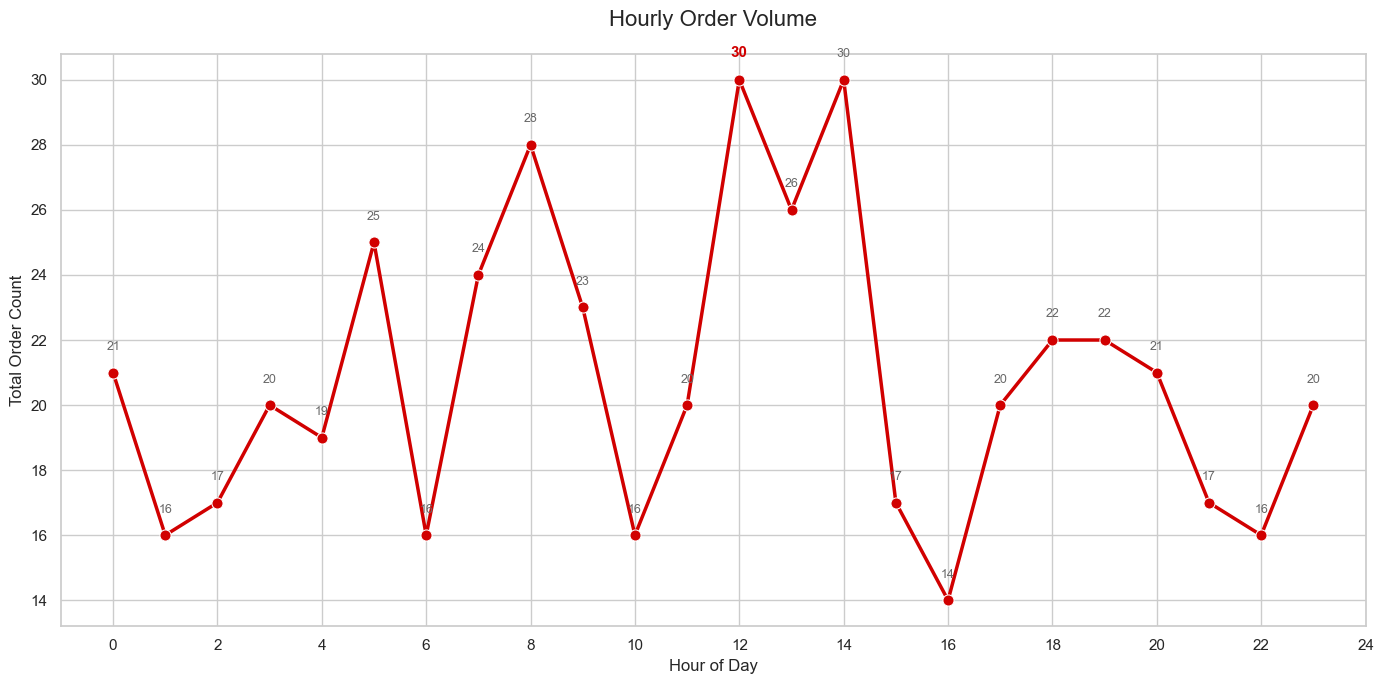

In [21]:
hourly_volume = df.groupby('Hour')['Order ID'].count().reset_index()

hourly_volume.rename(columns={'Order ID': 'Order Count'}, inplace=True)
all_hours = pd.DataFrame({'Hour': range(0, 24)})
peak_data = hourly_volume.loc[hourly_volume['Order Count'].idxmax()]

hourly_volume = pd.merge(all_hours, hourly_volume, on='Hour', how='left')
hourly_volume['Order Count'] = hourly_volume['Order Count'].fillna(0).astype(int)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7)) 

sns.lineplot(
    x="Hour",
    y="Order Count",
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='#D10000', 
    data=hourly_volume
)

STATIC_OFFSET = hourly_volume['Order Count'].max() * 0.02 

for index, row in hourly_volume.iterrows():
  
    if row['Order Count'] > 0:
        text_color = 'dimgray'
        font_weight = 'normal'
        font_size = 9

        if row['Hour'] == peak_data['Hour']:
            text_color = highlight_color  
            font_weight = 'bold'          
            font_size = 11                

        plt.text(
            x=row['Hour'],
            y=row['Order Count'] + STATIC_OFFSET,
            s=f"{row['Order Count']}", 
            ha='center',
            va='bottom',
            color=text_color,
            fontsize=font_size,
            fontweight=font_weight
        )
plt.title("Hourly Order Volume", fontsize=16, pad=20)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Total Order Count", fontsize=12)

plt.xticks(ticks=range(0, 25, 2)) 
plt.xlim(-1, 24) 

plt.tight_layout()
plt.show()

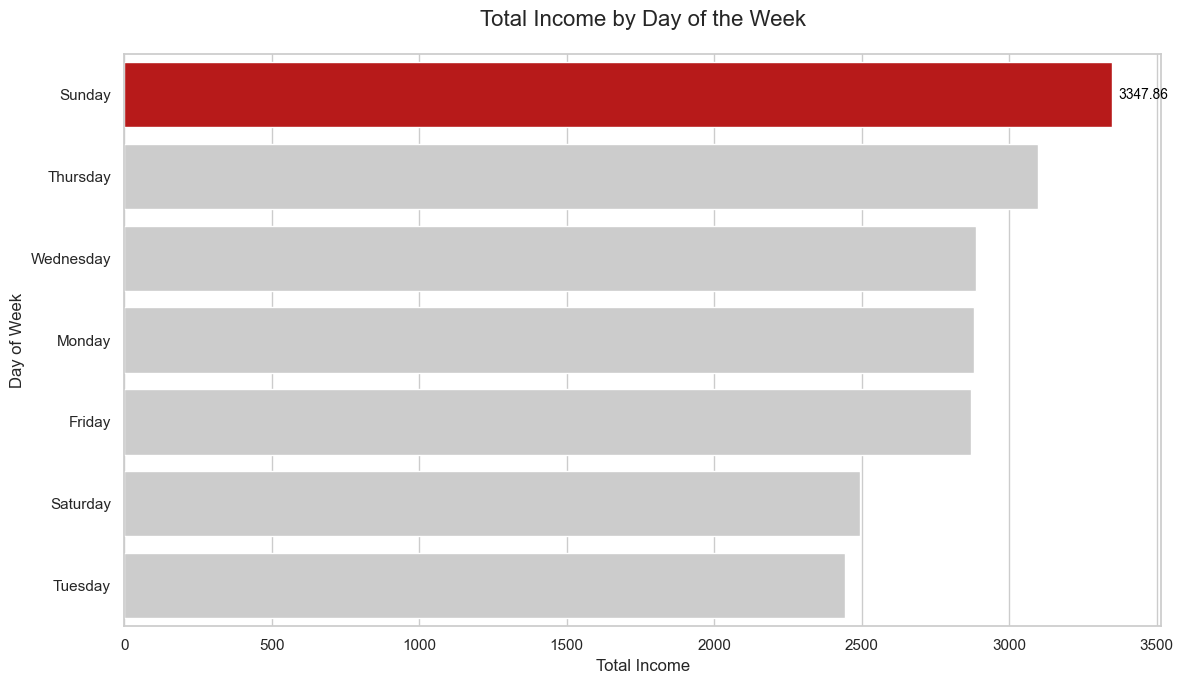

In [22]:
sns.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
highlight_color = "#D10000"
base_color = "#CCCCCC"

neword = df.groupby('Day Name')['Income'].sum().reset_index()
neword = neword.sort_values(by='Income', ascending=False)

num_days = len(neword)
colors = [highlight_color] + [base_color] * (num_days - 1)
sns.barplot(x ="Income",
                 y = "Day Name",
                 palette = colors, 
                 order = neword['Day Name'],
                 errorbar = None,
                 data = neword,
                 ax = ax)

ax.bar_label(ax.containers[0], fmt='%.2f', padding=5, fontsize=10, color='black')

ax.set_title("Total Income by Day of the Week",fontsize = 16,pad = 20)
ax.set_xlabel("Total Income",fontsize = 12)
ax.set_ylabel("Day of Week",fontsize = 12)

plt.tight_layout()
plt.show()


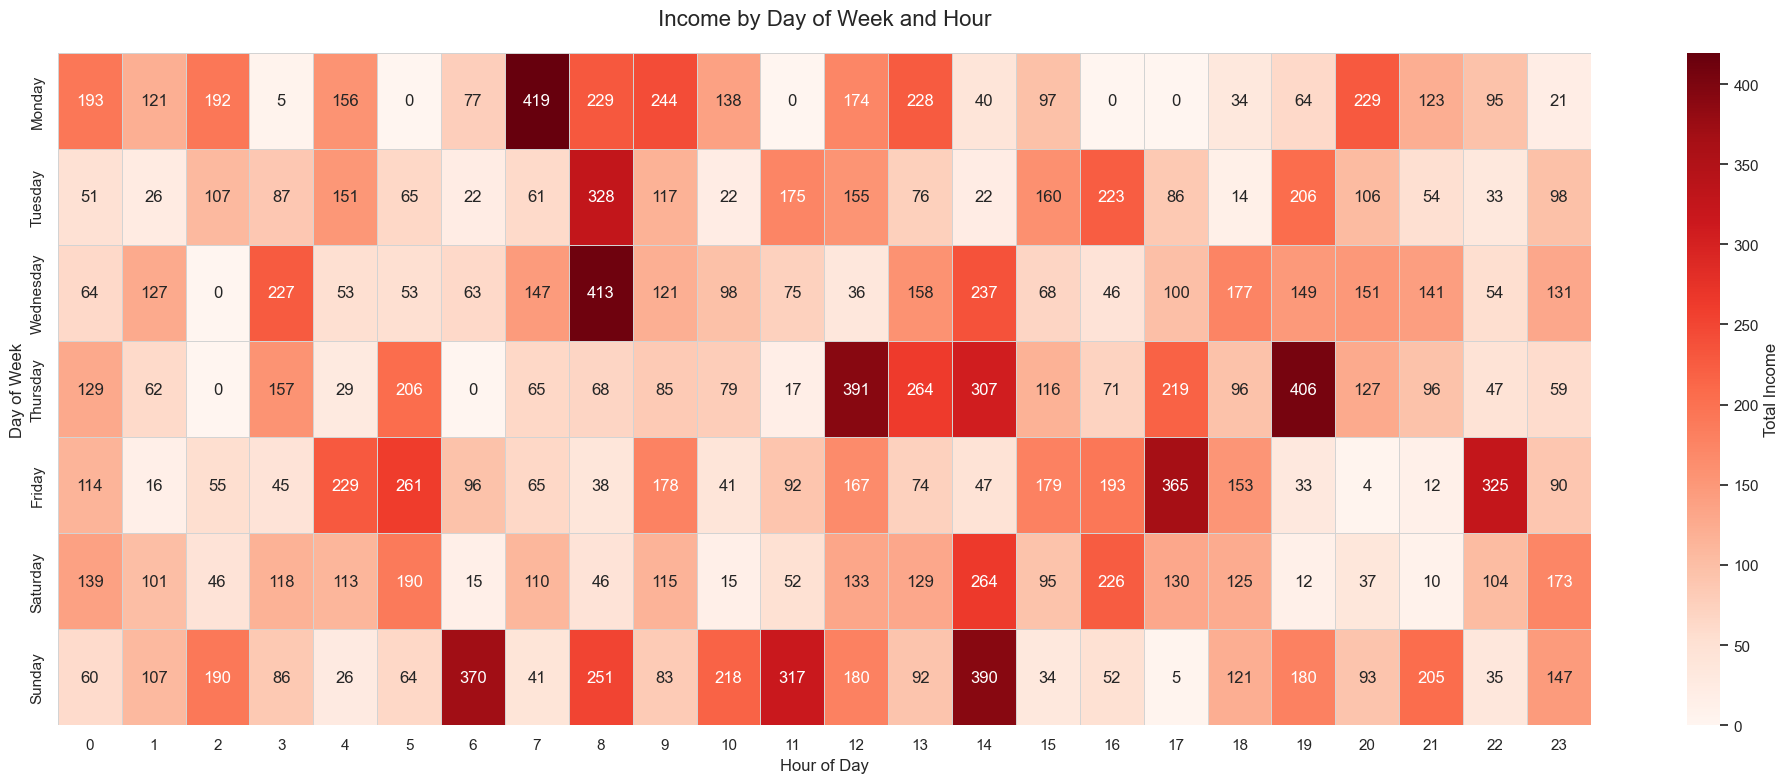

In [23]:
agg_df = df.groupby(['Day Name', 'Hour'])['Income'].sum().reset_index()

heatmap_data = agg_df.pivot(index='Day Name', columns='Hour', values='Income')

day_order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order_list)
heatmap_data = heatmap_data.fillna(0)
plt.figure(figsize=(20, 8)) 

ax = sns.heatmap(
    heatmap_data, 
    annot=True,           
    fmt=".0f",            
    cmap="Reds",          
    linewidths=.5,        
    linecolor='lightgray',
    cbar_kws={'label': 'Total Income'} 
)

plt.title("Income by Day of Week and Hour", fontsize=16, pad=20)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Week", fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


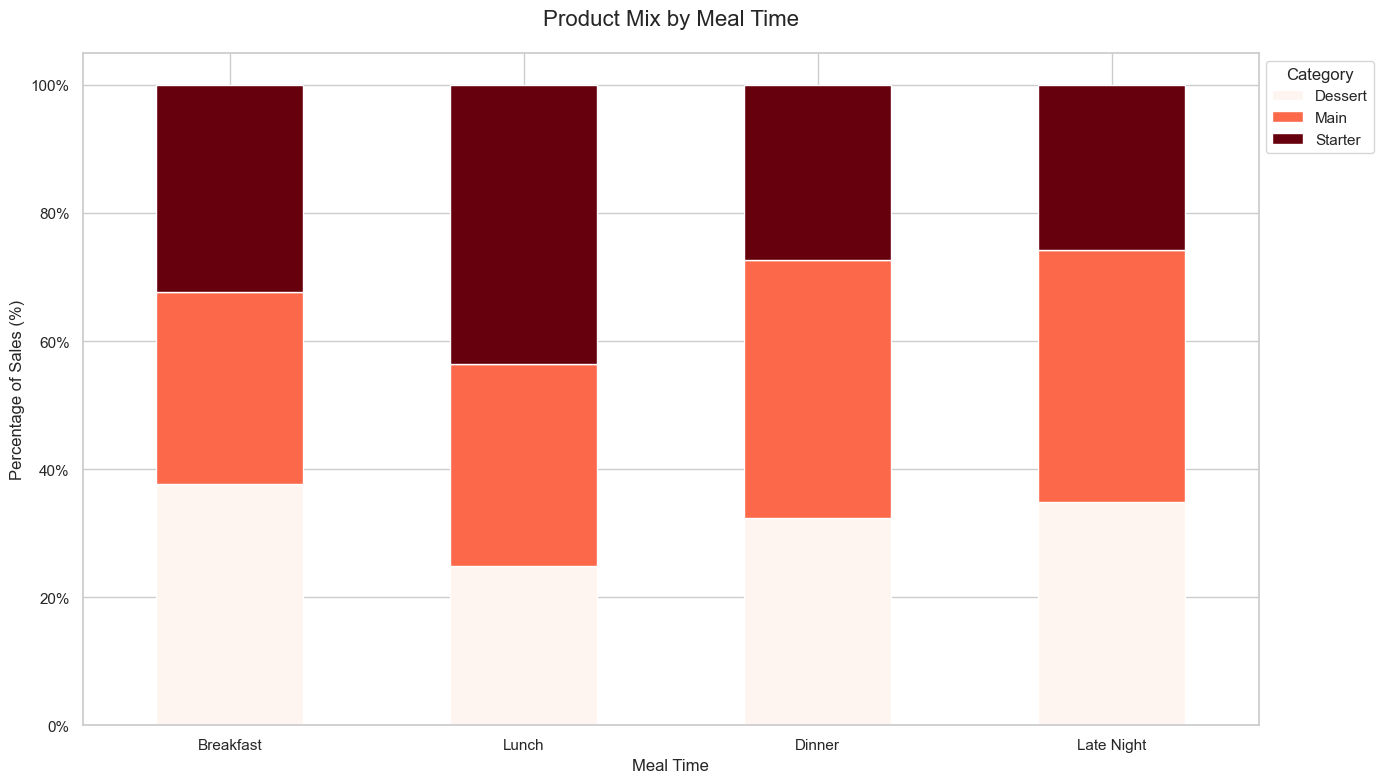

In [24]:
from matplotlib.ticker import PercentFormatter 
df_agg = df.groupby(['Meal Time', 'Category'])['Income'].sum().reset_index()

meal_time_totals = df_agg.groupby('Meal Time')['Income'].sum().reset_index()
meal_time_totals.rename(columns={'Income': 'Total_Income_for_Meal'}, inplace=True)

df_merged = pd.merge(df_agg, meal_time_totals, on='Meal Time')
df_merged['Percentage'] = df_merged['Income'] / df_merged['Total_Income_for_Meal']
df_pivot = df_merged.pivot(index='Meal Time', columns='Category', values='Percentage')

meal_time_order = ['Breakfast', 'Lunch', 'Dinner', 'Late Night']
df_pivot = df_pivot.reindex(meal_time_order)
df_pivot = df_pivot.fillna(0)

sns.set_theme(style="whitegrid")
ax = df_pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8), 
    cmap='Reds' 
)
plt.title('Product Mix by Meal Time', fontsize=16, pad=20)
plt.xlabel('Meal Time', fontsize=12)
plt.ylabel('Percentage of Sales (%)', fontsize=12)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=0)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Category")

plt.tight_layout()
plt.show()


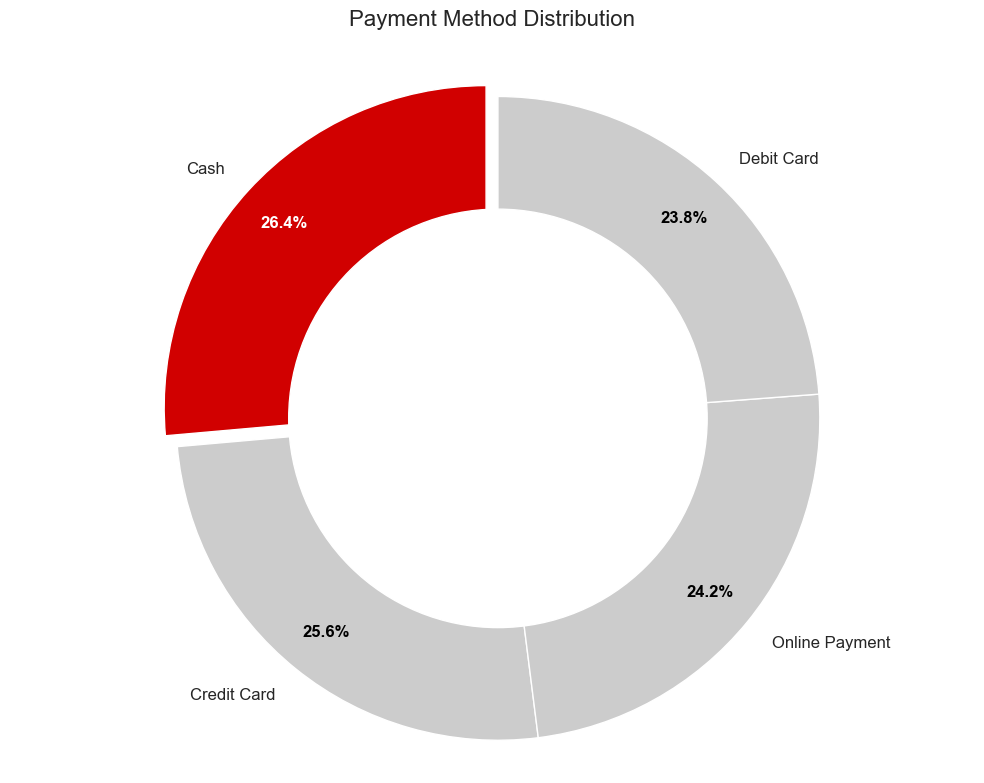

In [25]:
df_agg3 = df['Payment Method'].value_counts().reset_index()
df_agg3.columns = ['Payment Method', 'Order Count']

num_categories4 = len(df_agg3)
colors = [highlight_color] + [base_color] * (num_categories4 - 1)
explode = [0.05] + [0] * (num_categories4 - 1)

sns.set_theme(style="whitegrid") 
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(
    df_agg3['Order Count'],      
    labels=df_agg3['Payment Method'], 
    colors=colors,              
    explode=explode,            
    autopct='%1.1f%%',          
    startangle=90,
    pctdistance=0.85,           
    textprops={'fontsize': 12}
)
autotexts[0].set_color('white') 
autotexts[0].set_weight('bold')
for i in range(1, len(autotexts)):
    autotexts[i].set_color('black') 
    autotexts[i].set_weight('bold')

centre_circle = plt.Circle((0, 0), 0.65, fc='white')
ax.add_artist(centre_circle)

ax.axis('equal') 

plt.title('Payment Method Distribution', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


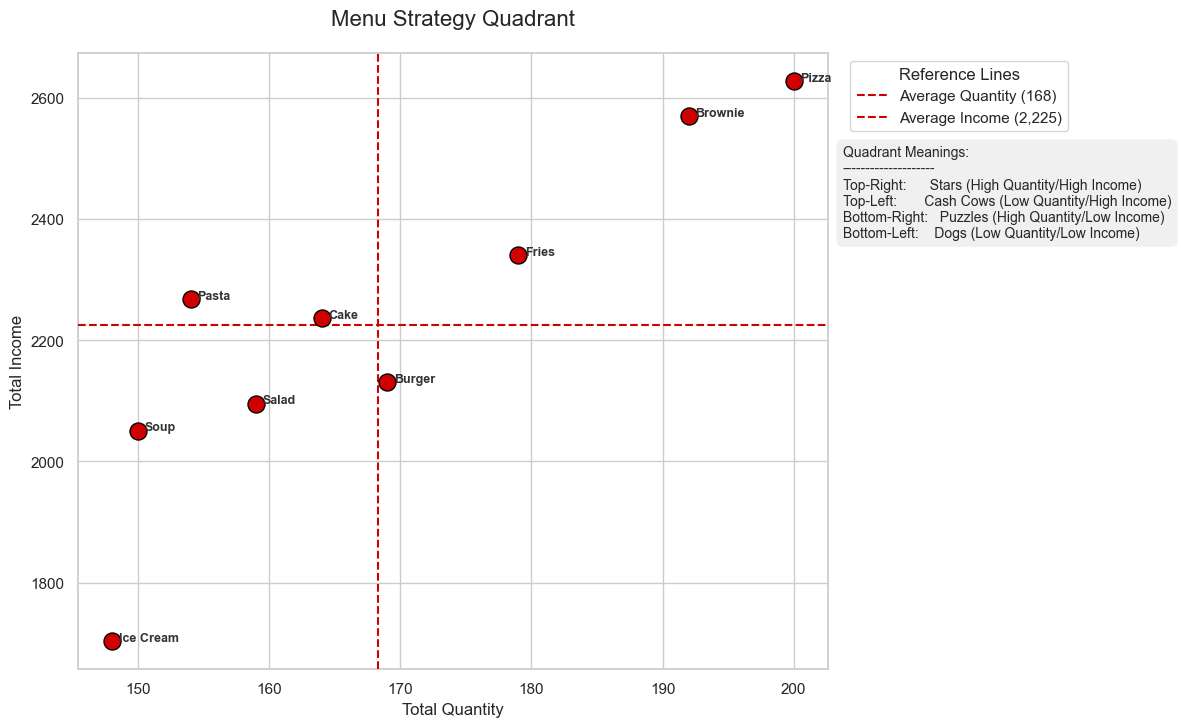

In [26]:
df_agg = df.groupby('Food Item').agg(
    Quantity=('Quantity', 'sum'),
    Income=('Income', 'sum')
).reset_index()

avg_quantity = df_agg['Quantity'].mean()
avg_income = df_agg['Income'].mean()

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))


ax = sns.scatterplot(
    data=df_agg,
    x='Quantity',
    y='Income',
    s=150,
    color='#D10000',
    edgecolor='black',
    zorder=5
)
plt.axvline(x=avg_quantity, color=highlight_color, linestyle='--', linewidth=1.5, label=f'Average Quantity ({avg_quantity:,.0f})', zorder=3)
plt.axhline(y=avg_income, color=highlight_color, linestyle='--', linewidth=1.5, label=f'Average Income ({avg_income:,.0f})', zorder=3)

text_offset_x = (df_agg['Quantity'].max() - df_agg['Quantity'].min()) * 0.01
for index, row in df_agg.iterrows():
    plt.text(
        x=row['Quantity'] + text_offset_x,
        y=row['Income'],
        s=row['Food Item'],
        fontsize=9,
        fontweight='bold',
        color='#333333',
        zorder=6
    )

plt.title('Menu Strategy Quadrant', fontsize=16, pad=20)
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Total Income', fontsize=12)

plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1.0),
    title="Reference Lines"
)

quadrant_text = (
    "Quadrant Meanings:\n"
    "--------------------\n"
    "Top-Right:      Stars (High Quantity/High Income)\n"
    "Top-Left:       Cash Cows (Low Quantity/High Income)\n"
    "Bottom-Right:   Puzzles (High Quantity/Low Income)\n"
    "Bottom-Left:    Dogs (Low Quantity/Low Income)"
)

plt.text(
    1.02, 0.85,
    quadrant_text,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='#F0F0F0', alpha=1)
)
plt.subplots_adjust(right=0.75)

plt.show()
